In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [49]:
#load the data
uploaded = pd.read_csv(r"C:\Users\Acer\Desktop\Stock-MArket-Forecasting-master\coin_Ethereum.csv")

In [50]:
#store the data in the data frame
df = pd.read_csv('coin_Ethereum.csv')
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [51]:
#get  the no of trading days
df.shape

(2031, 10)

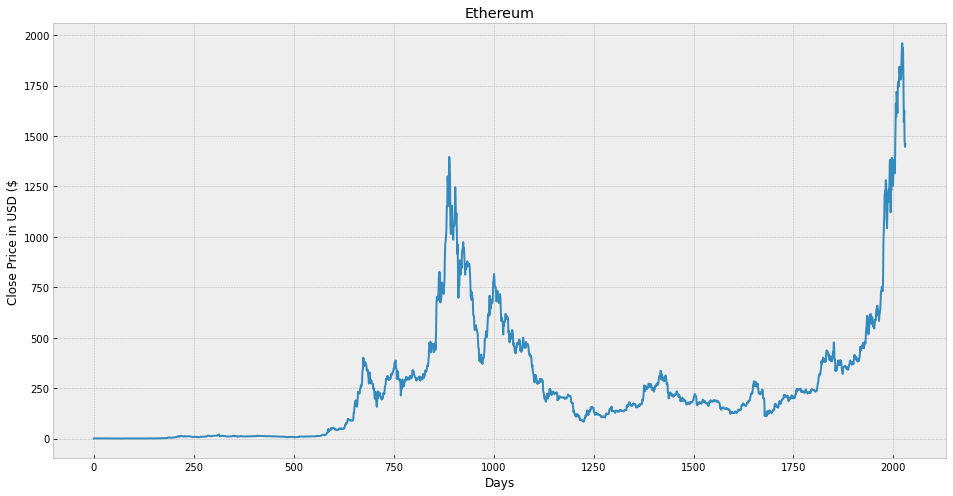

In [52]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Ethereum')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($')
plt.plot(df['Close'])
plt.show()

In [53]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,0.753325
1,0.701897
2,0.708448
3,1.067860


In [54]:
#create a variable to predict 'x' days out into the future
future_days = 25
#create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,0.753325,1.29479
1,0.701897,1.26493
2,0.708448,1.27441
3,1.067860,1.33881


In [55]:
#create the feature dataset (X) and convert it into a numpy arr and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[7.53324986e-01]
 [7.01897025e-01]
 [7.08447993e-01]
 ...
 [1.31498623e+03]
 [1.36904047e+03]
 [1.51519377e+03]]


In [56]:
#create the target data set (y) and convert it into numpy array and get the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[1.29479003e+00 1.26493001e+00 1.27441001e+00 ... 1.47570374e+03
 1.44603365e+03 1.45997312e+03]


In [57]:
#split the data 75% training and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [58]:
#create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model 
lr = LinearRegression().fit(x_train, y_train)

In [29]:
#get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[40254.54649816],
       [38356.43950662],
       [35566.65594049],
       [33922.9605815 ],
       [37316.35939997],
       [39187.32812109],
       [36825.36585131],
       [36178.13890106],
       [35791.27792129],
       [36630.07568284],
       [36069.80639361],
       [35547.7508855 ],
       [30825.69850603],
       [33005.76356216],
       [32067.64288212],
       [32289.37808687],
       [32366.39304887],
       [32569.84955679],
       [30432.54707881],
       [33466.09635821],
       [34316.38765032],
       [34269.52154165],
       [33114.35774753],
       [33537.1768196 ],
       [35510.28903716]])

In [59]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[757.06799316 757.06799316 757.06799316 757.06799316 757.06799316
 757.06799316 757.06799316 757.06799316 757.06799316 757.06799316
 757.06799316 757.06799316 757.06799316 757.06799316 757.06799316
 757.06799316 757.06799316 757.06799316 757.06799316 757.06799316
 757.06799316 757.06799316 757.06799316 757.06799316 757.06799316]

[43292.87542172 41251.77756112 38251.83009044 36484.30955779
 40133.3446751  42145.25984687 39605.36290894 38909.37814657
 38493.37361064 39395.36086647 38792.8845821  38231.50085322
 33153.72017367 35498.01696087 34489.22445257 34727.66372604
 34810.48048762 35029.26406773 32730.95130945 35993.02819541
 36907.37482864 36856.97813626 35614.79191635 36069.46339023
 38191.21687616]


<ipython-input-60-abbe6f3c2214>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


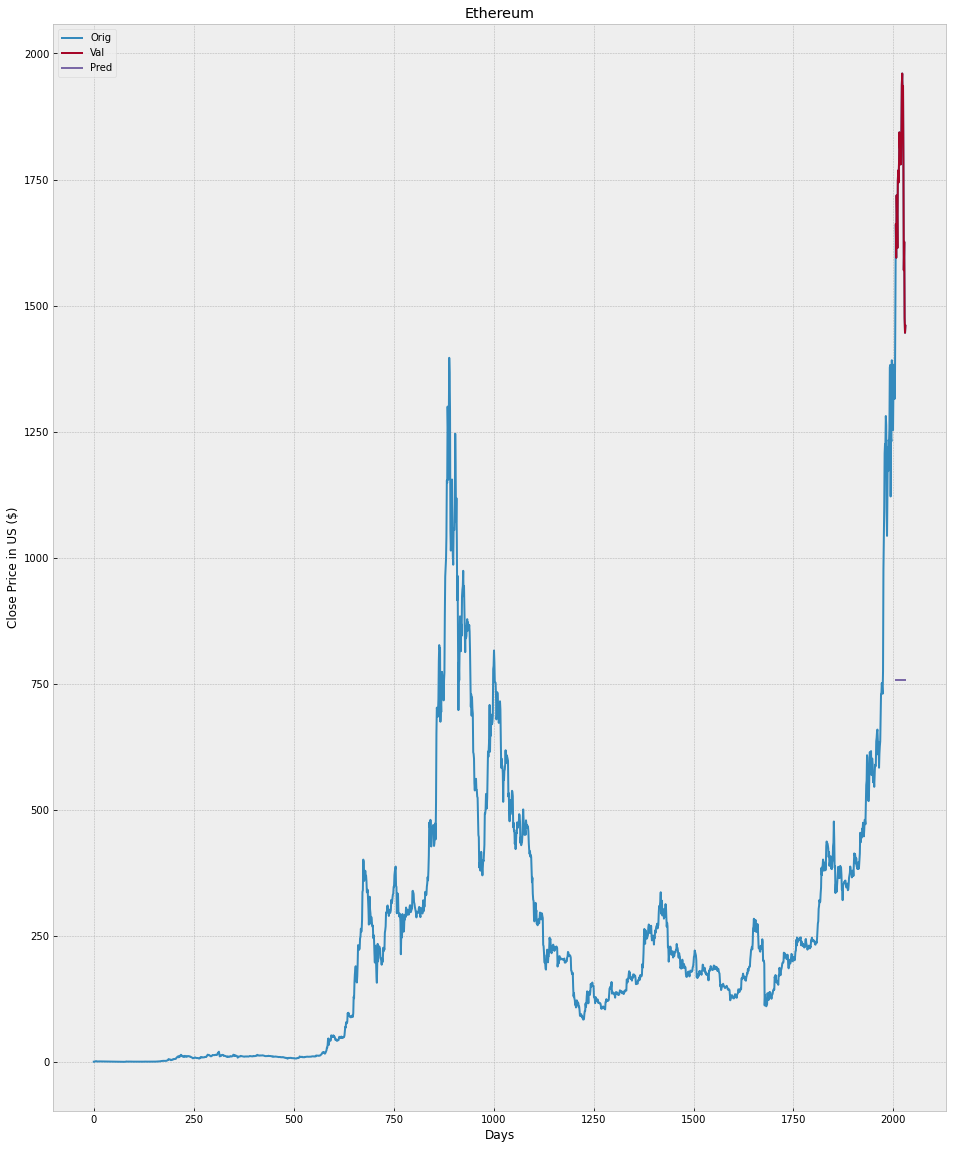

In [60]:
#visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,20))
plt.title('Ethereum')
plt.xlabel('Days')
plt.ylabel('Close Price in US ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()